In [1]:
#install.packages('mcmcse')
options(warn=-1)
library(mcmcse)

mcmcse: Monte Carlo Standard Errors for MCMC
Version 1.3-2 created on 2017-07-03.
copyright (c) 2012, James M. Flegal, University of California, Riverside
                    John Hughes, University of Colorado, Denver
                    Dootika Vats, University of Warwick
                    Ning Dai, University of Minnesota
 For citation information, type citation("mcmcse").
 Type help("mcmcse-package") to get started.



Load the samples from the Jupyter Python Notebook

In [2]:
dataframe_markovchain <- read.table("combined.txt", header = FALSE)

Draw the confidence region for the parameters

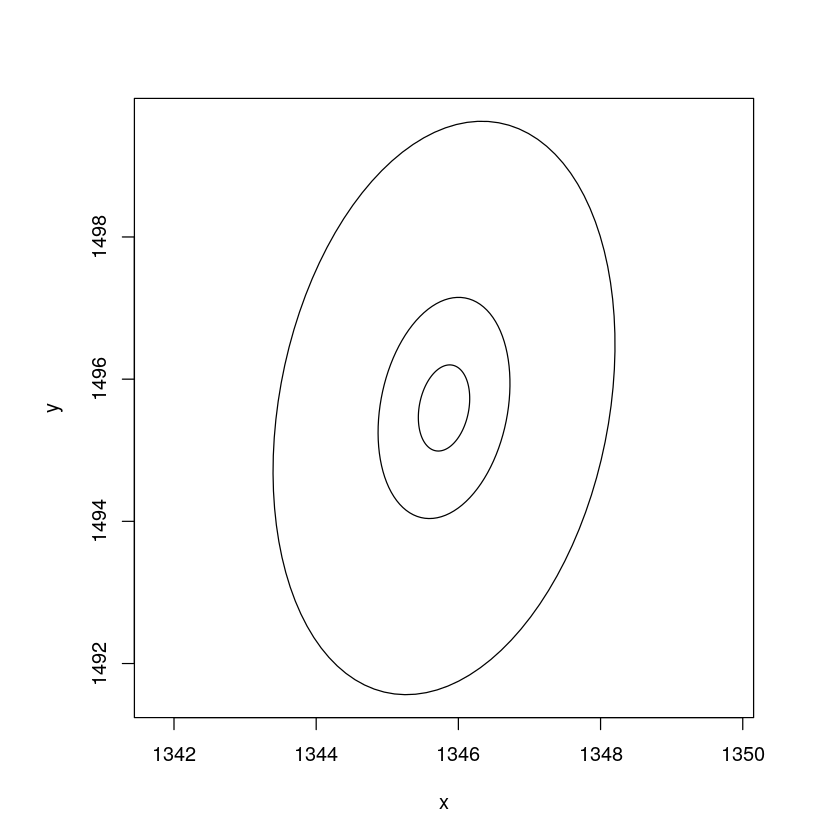

In [3]:
dataframe_markovchain[, c(length( names( dataframe_markovchain ) )  ) ]<-NULL
par(pty="s") # square axis
plot(confRegion(mcse.multi(dataframe_markovchain[,]), which = c(1,2), level = 0.99), type='l', pty="s", asp = 1)
lines(confRegion(mcse.multi(dataframe_markovchain[,]), which = c(1,2), level = 0.5))
lines(confRegion(mcse.multi(dataframe_markovchain[,]), which = c(1,2), level = 0.1))

In [4]:
parameter1 = as.vector(dataframe_markovchain[,1])
parameter2 = as.vector(dataframe_markovchain[,60])

par(mar=c(0,0,2,0)+.1)
par(pin=c(2.5,2.5)) 
pdf('acf1.pdf',width=4.5,height=4.5,paper='special')
acf(parameter1, lag.max = 99999999999,
    type = "correlation", 
    plot = TRUE, na.action = na.fail, demean = TRUE, main="")
dev.off()
pdf('acf60.pdf',width=4.5,height=4.5,paper='special')
acf(parameter2, lag.max = 99999999999,
    type = "correlation",
    plot = TRUE, na.action = na.fail, demean = TRUE, main="")
dev.off()

png 
  2

png 
  2

In [5]:
mess <- multiESS(dataframe_markovchain) # The multivariate ESS using mcmcse
ess2 <- ess(dataframe_markovchain, method = "tukey") # The per-parameter ESS using mcmcse
neededSamples <- minESS(ncol(dataframe_markovchain))

mess
ess2

neededSamples

toDelete <- seq(0, nrow(dataframe_markovchain), 2)
dataframe_markovchain_minus <-  dataframe_markovchain[-toDelete, ]

mess <- multiESS(dataframe_markovchain_minus) # The multivariate ESS using mcmcse
ess2 <- ess(dataframe_markovchain_minus, method = "tukey") # The per-parameter ESS using mcmcse
neededSamples <- minESS(ncol(dataframe_markovchain_minus))

mess
ess2


[1] 794.6899

V1       V2       V3       V4       V5       V6       V7       V8 
782.5842 545.3959 507.9565 463.2579 552.1261 466.8347 481.8127 473.5996 
      V9      V10      V11      V12      V13      V14      V15      V16 
507.9675 501.4977 433.4713 418.5226 446.3890 468.7717 471.4973 461.0138 
     V17      V18      V19      V20      V21      V22      V23      V24 
436.1447 441.5721 481.8760 464.0353 626.0965 475.5645 470.4070 441.6738 
     V25      V26      V27      V28      V29      V30      V31      V32 
451.4851 435.9819 385.3022 399.7376 372.8449 404.9911 389.2495 396.6408 
     V33      V34      V35      V36      V37      V38      V39      V40 
361.8900 370.2252 365.3847 447.2588 369.0227 383.9001 370.9580 381.6480 
     V41      V42      V43      V44      V45      V46      V47      V48 
385.4705 376.6631 376.7398 364.8776 372.9279 399.3947 374.2200 369.3336 
     V49      V50      V51      V52      V53      V54      V55      V56 
371.5229 399.8557 694.9802 631.0919 667.8570 562.1109 665.2992 482.6363 
     V57      V58      V59      V60      V61      V62      V63      V64 
575.0970 535.3906 587.8521 517.8060 439.8949 479.1148 545.9171 514.9073 
     V65      V66      V67      V68      V69      V70      V71      V72 
589.0913 486.6375 557.4414 458.5912 510.4808 451.7701 692.9698 549.3132 
     V73      V74      V75 
527.6107 480.6794 463.9082

minESS 
  8148

[1] 699.2152

V1       V2       V3       V4       V5       V6       V7       V8 
686.5387 446.5319 403.7866 361.2394 445.3913 366.6000 379.6242 368.8878 
      V9      V10      V11      V12      V13      V14      V15      V16 
401.6048 402.3073 336.0295 318.3880 341.4501 364.5700 368.5954 362.2401 
     V17      V18      V19      V20      V21      V22      V23      V24 
334.2208 341.5889 379.8879 366.0397 533.0567 381.3821 373.8663 342.4515 
     V25      V26      V27      V28      V29      V30      V31      V32 
351.5912 336.8047 286.7362 301.2509 274.3865 305.6042 290.2044 297.4255 
     V33      V34      V35      V36      V37      V38      V39      V40 
263.1741 270.5304 267.2373 346.5905 270.2338 285.4449 272.4742 282.5596 
     V41      V42      V43      V44      V45      V46      V47      V48 
286.3673 277.3402 278.2610 265.8551 273.7325 299.2030 275.3727 270.1224 
     V49      V50      V51      V52      V53      V54      V55      V56 
272.5978 302.0491 571.0997 521.1290 573.3900 460.0491 555.3751 379.3415 
     V57      V58      V59      V60      V61      V62      V63      V64 
469.2011 434.2378 473.6507 416.5571 336.1453 380.0140 437.2629 412.6166 
     V65      V66      V67      V68      V69      V70      V71      V72 
481.7401 383.4961 454.4382 356.5942 408.5270 349.6841 595.9029 441.8054 
     V73      V74      V75 
424.8203 383.5033 363.8942

In [6]:
par(mar=c(0,0,2,0)+.1)
par(pin=c(2.5,2.5)) 
pdf('mean_ss.pdf',width=4.5,height=4.5,paper='special')
estvssamp(as.vector(dataframe_markovchain[,60]), main = "Mean vs sample size")
estvssamp(as.vector(dataframe_markovchain[,65]), main = "Mean vs sample size", add=TRUE)
legend(3100, 7, legend=c("m1", "m2"),
       col=c("red", "blue"), lty=1:1, cex=0.8)
dev.off()

pdf('var_ss.pdf',width=4.5,height=4.5,paper='special')
estvssamp(as.vector(dataframe_markovchain[,60]), g=var, main = "Variance vs sample size")
estvssamp(as.vector(dataframe_markovchain[,65]), g=var, main = "Variance vs sample size", add=TRUE)
legend(3100, 3.5, legend=c("m1", "m2"),
       col=c("red", "blue"), lty=1:1, cex=0.8)
dev.off()

png 
  2

png 
  2

In [3]:
library('coda')

In [4]:
mcmcOb = mcmc(dataframe_markovchain)
mcmcOb_burned <- burnAndThin(mcmcOb, burn = 1000)

ERROR: Error in burnAndThin(mcmcOb, burn = 1000): could not find function "burnAndThin"


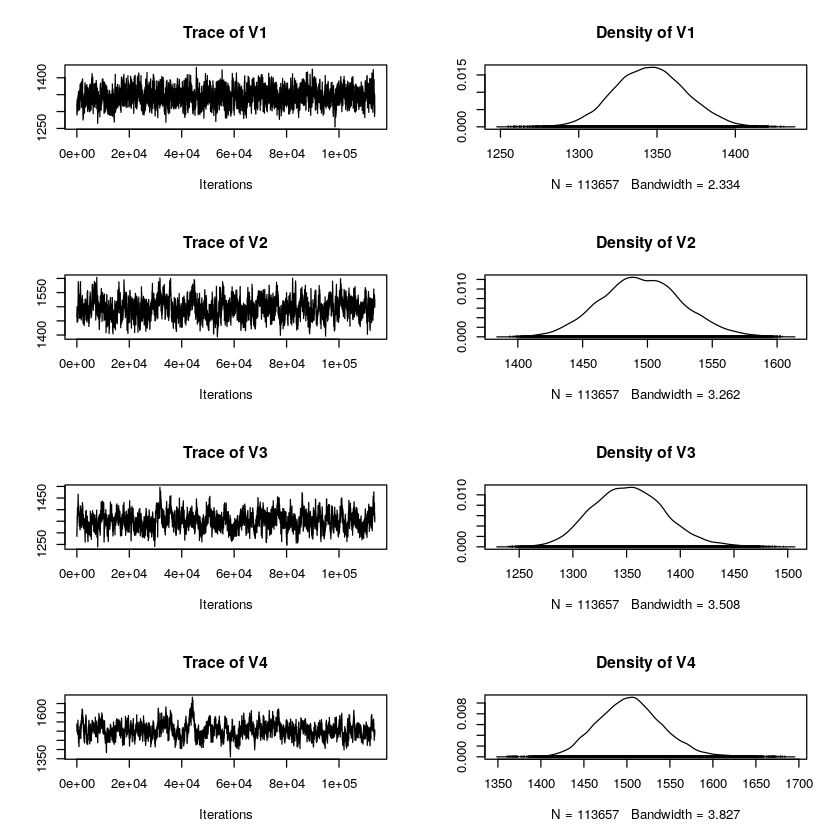

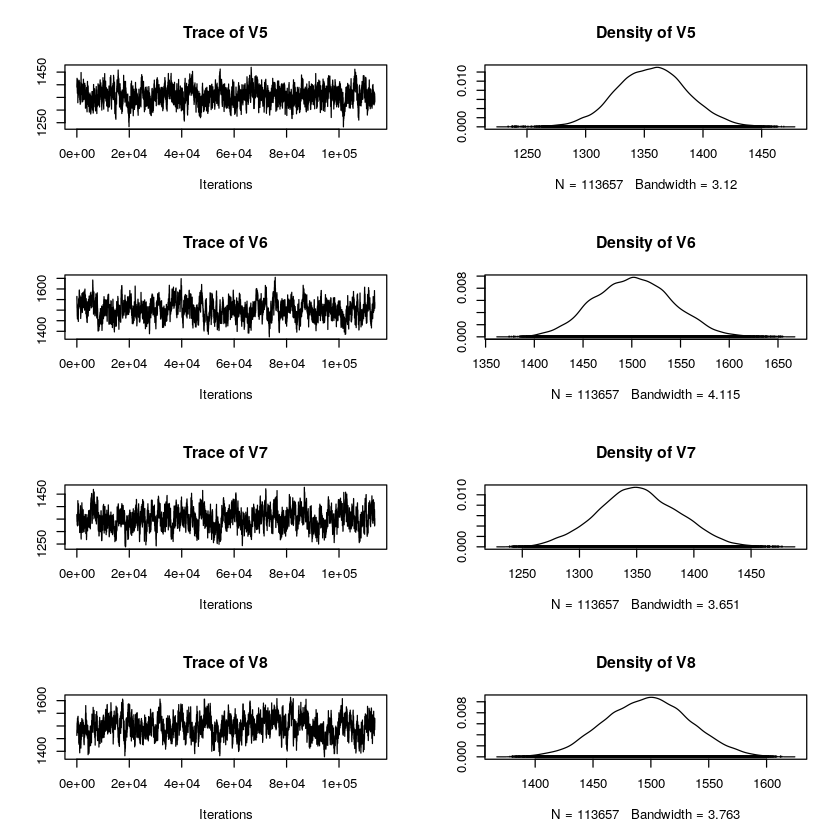

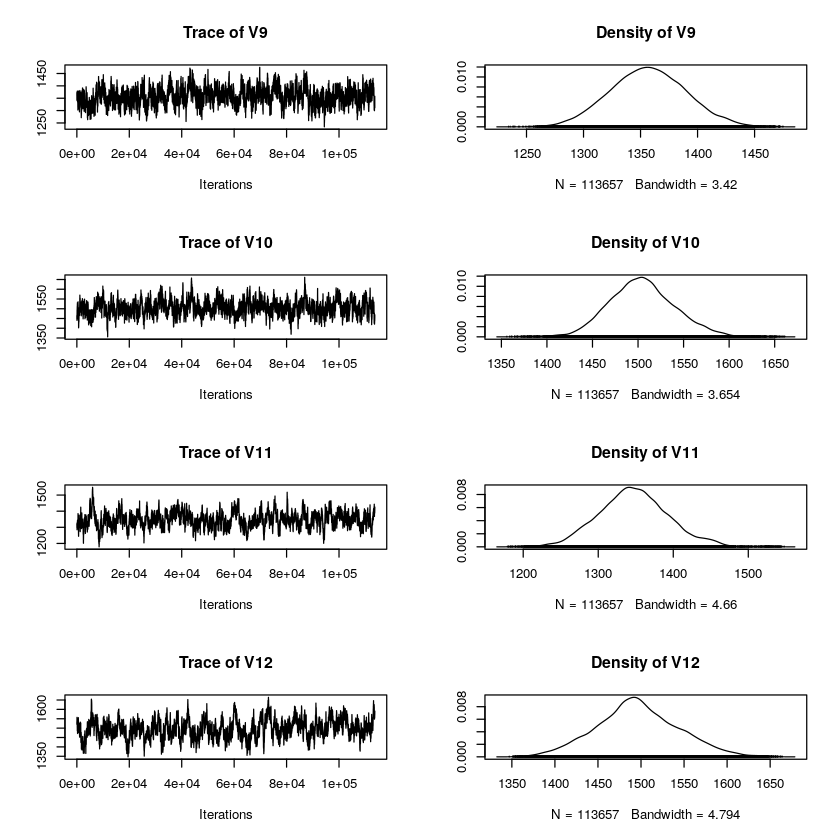

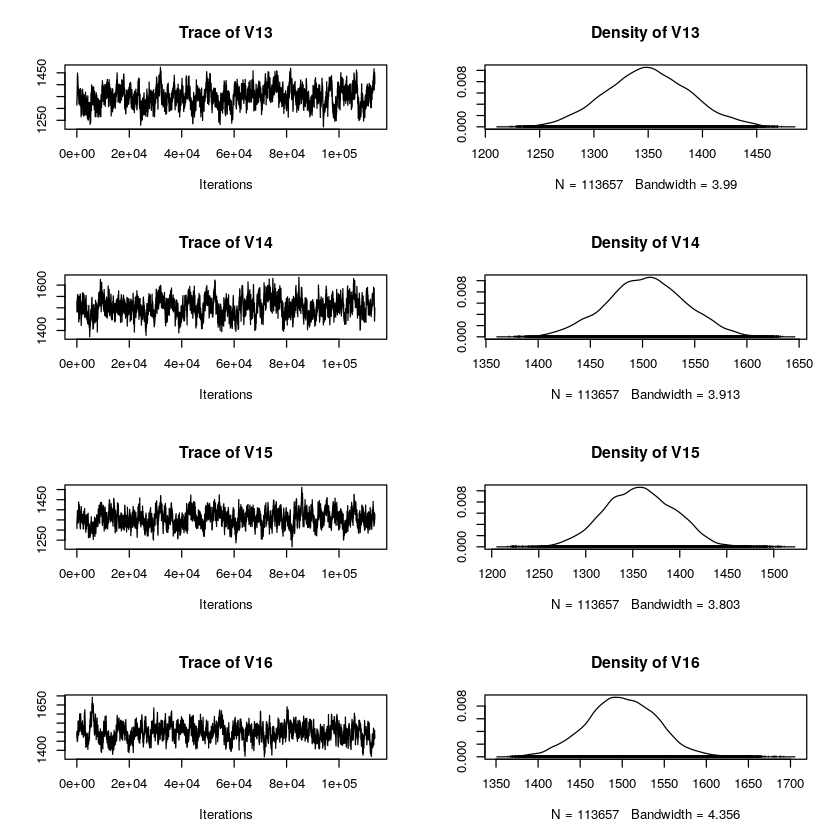

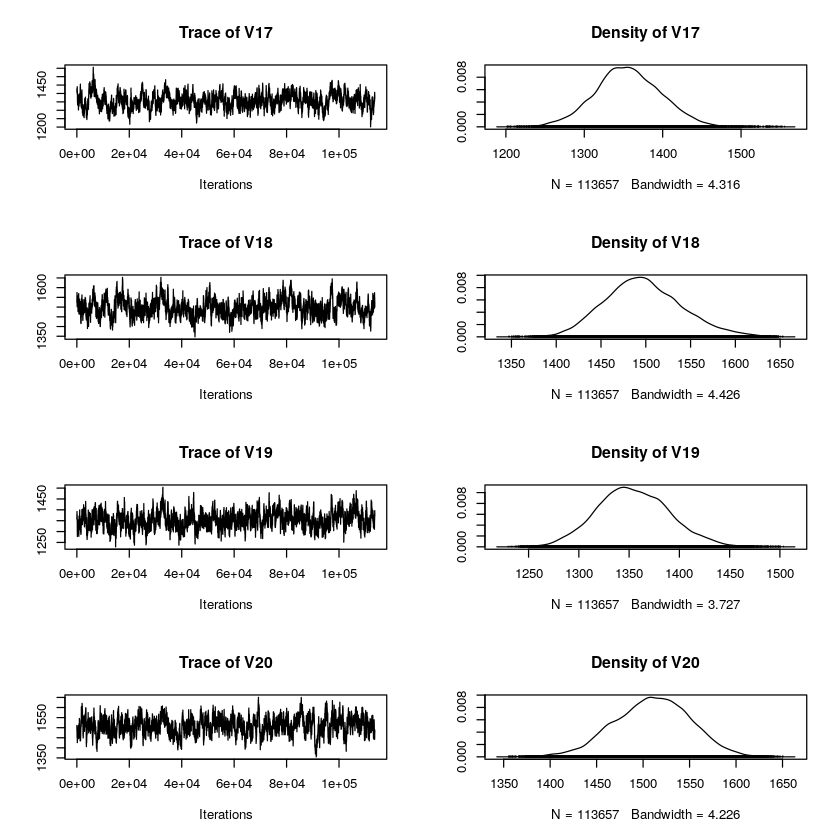

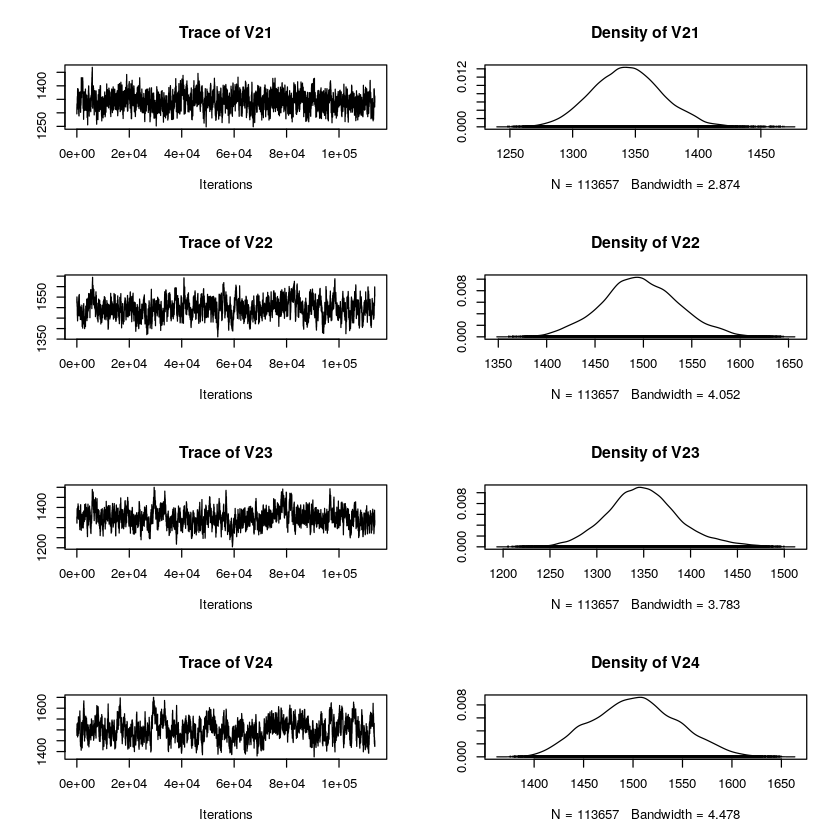

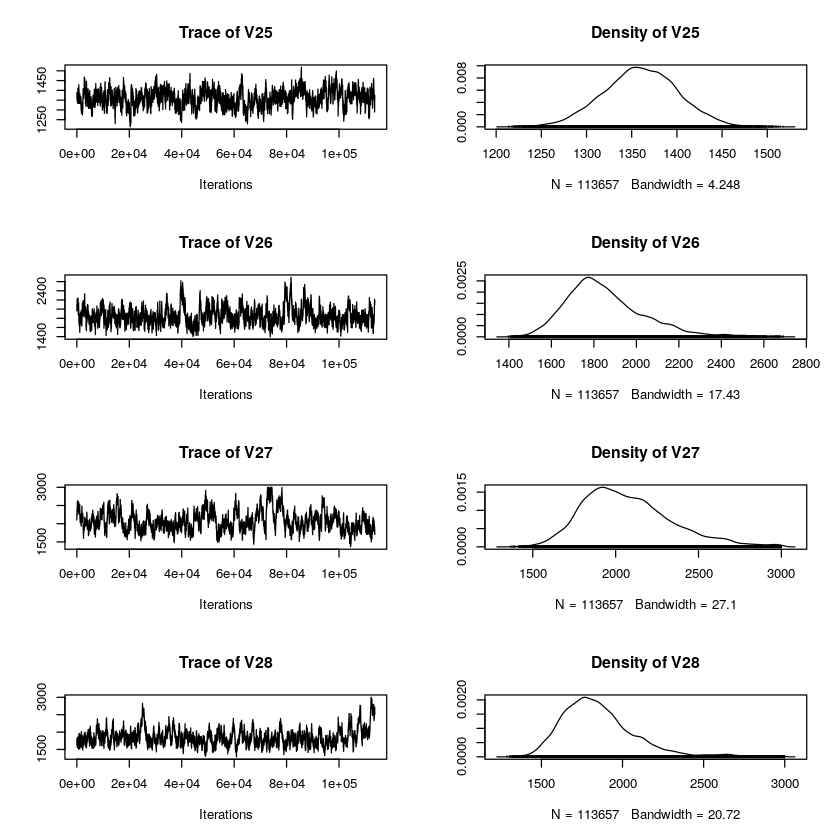

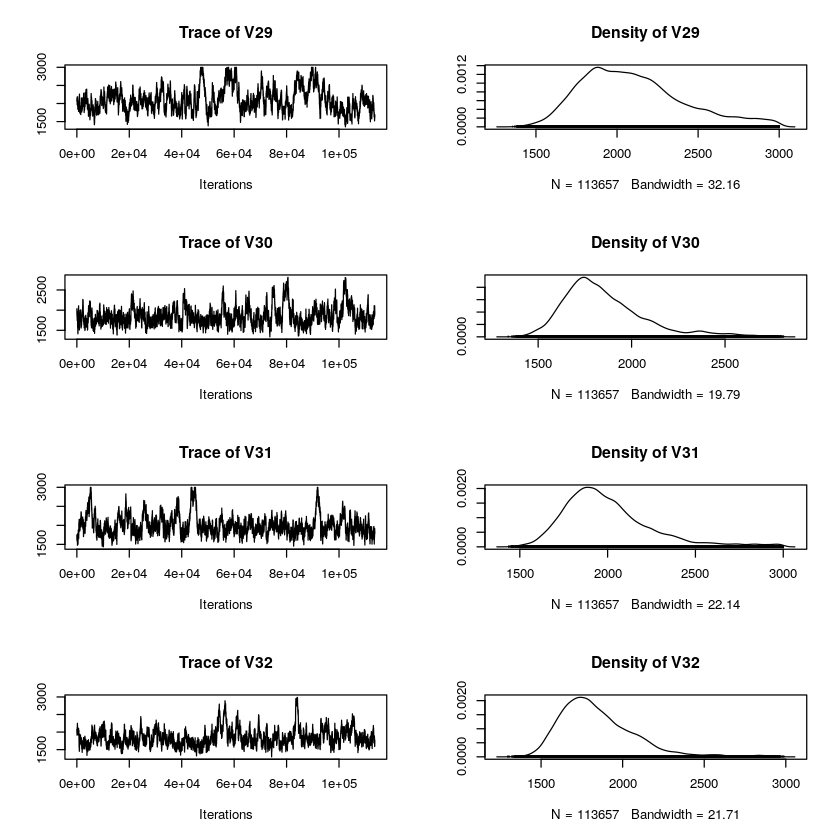

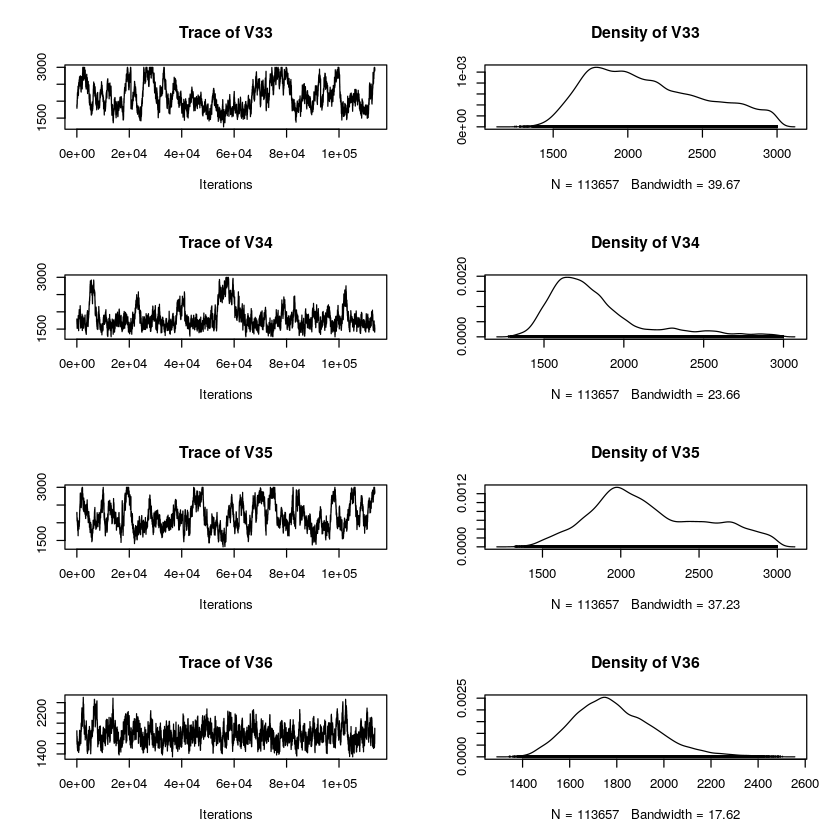

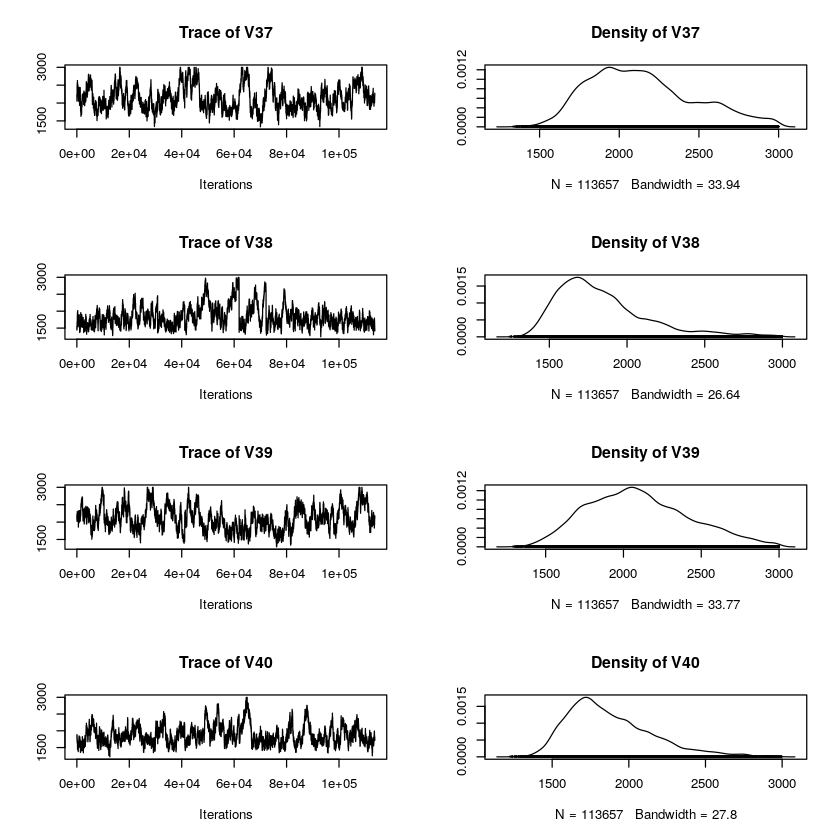

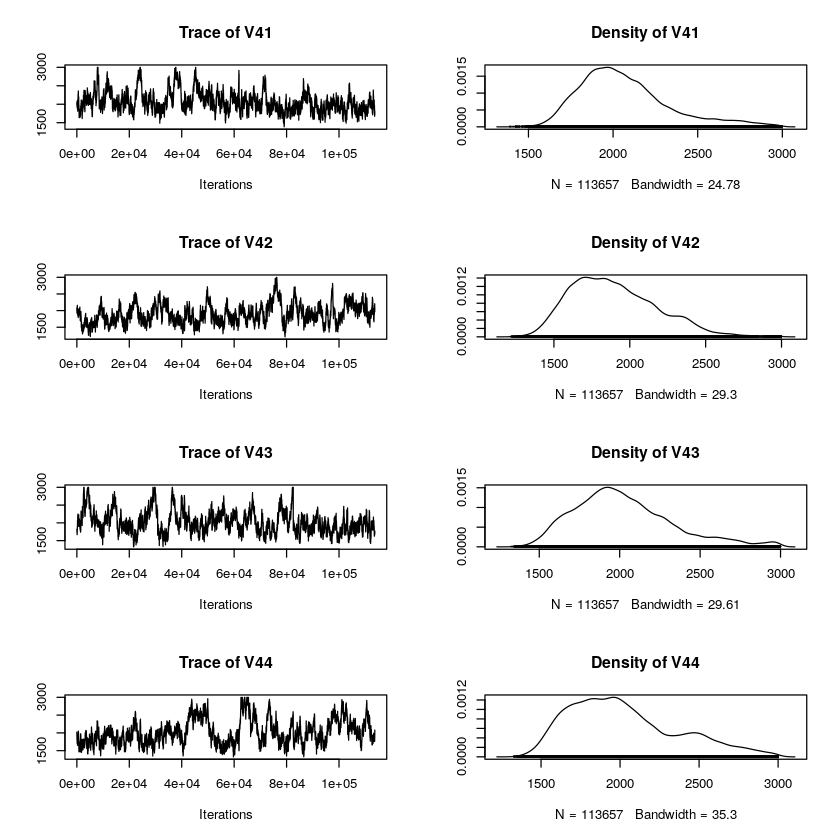

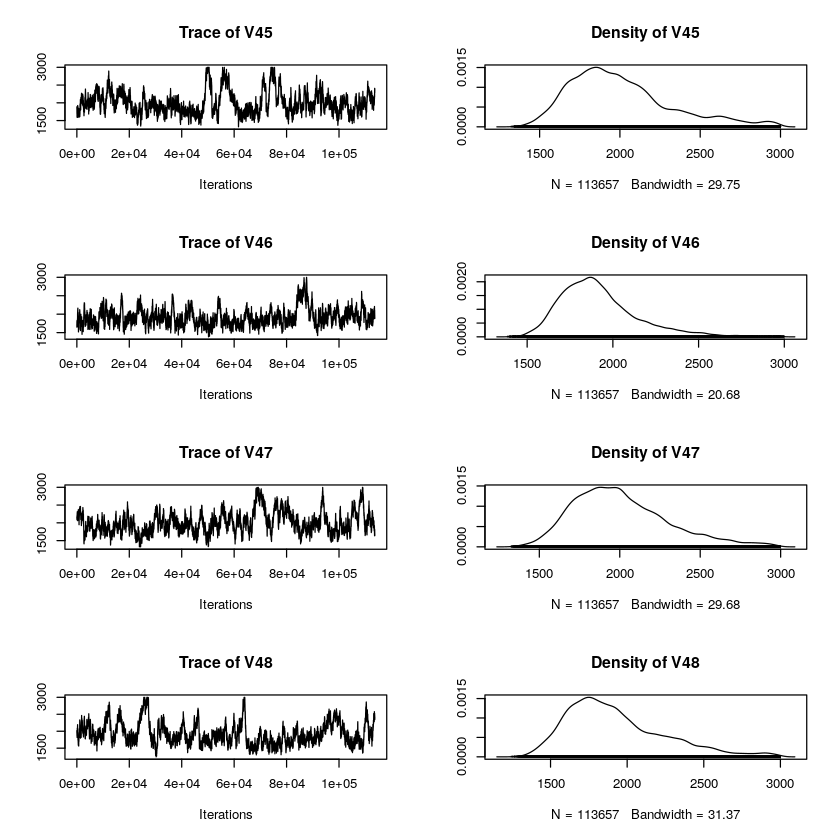

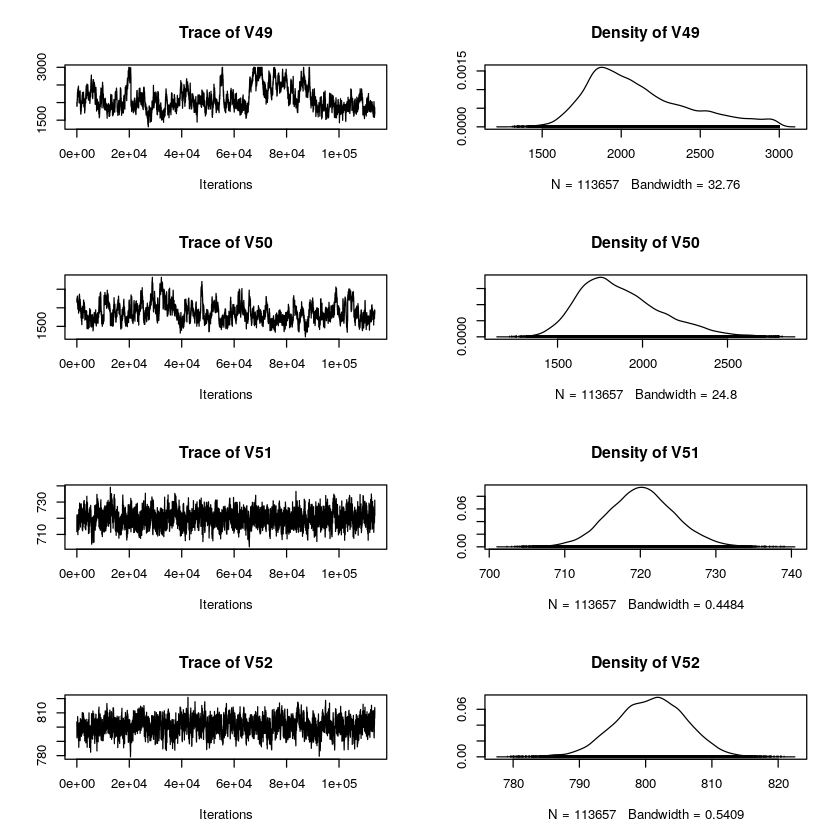

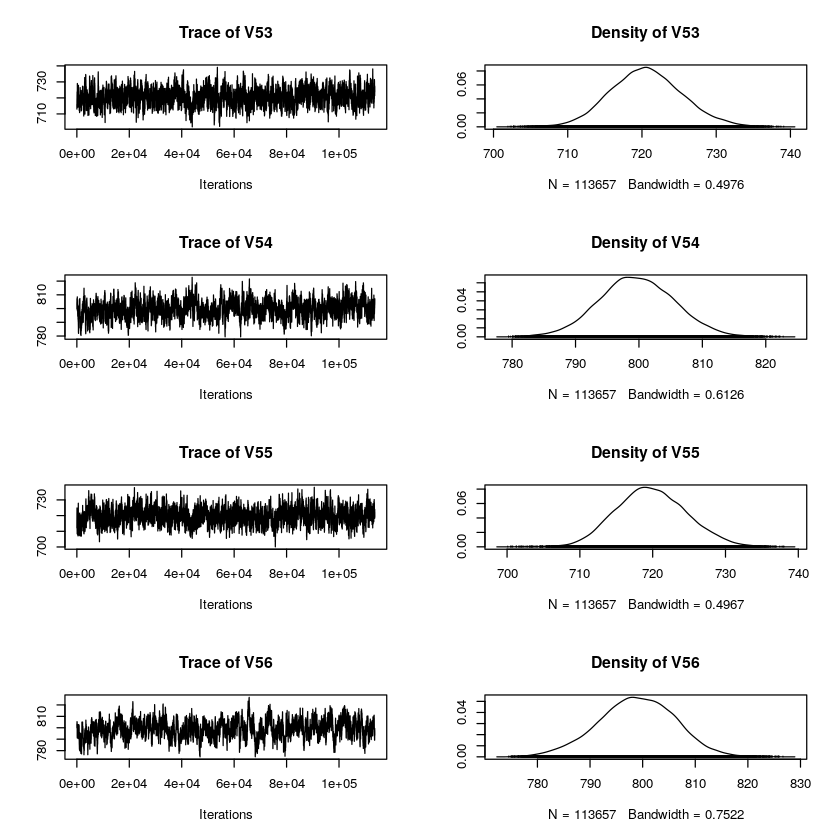

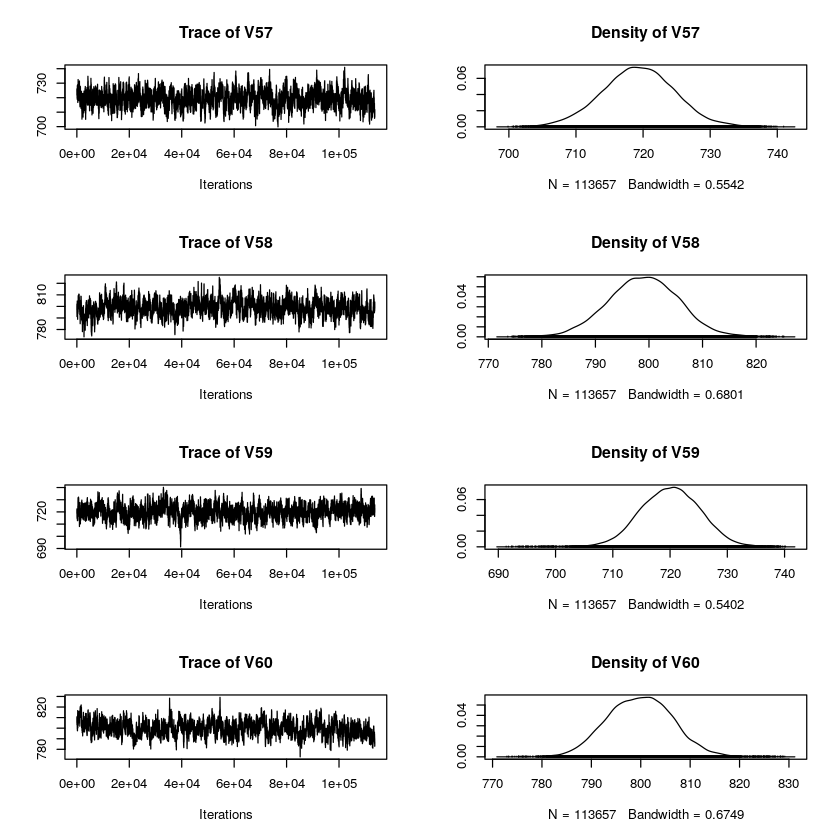

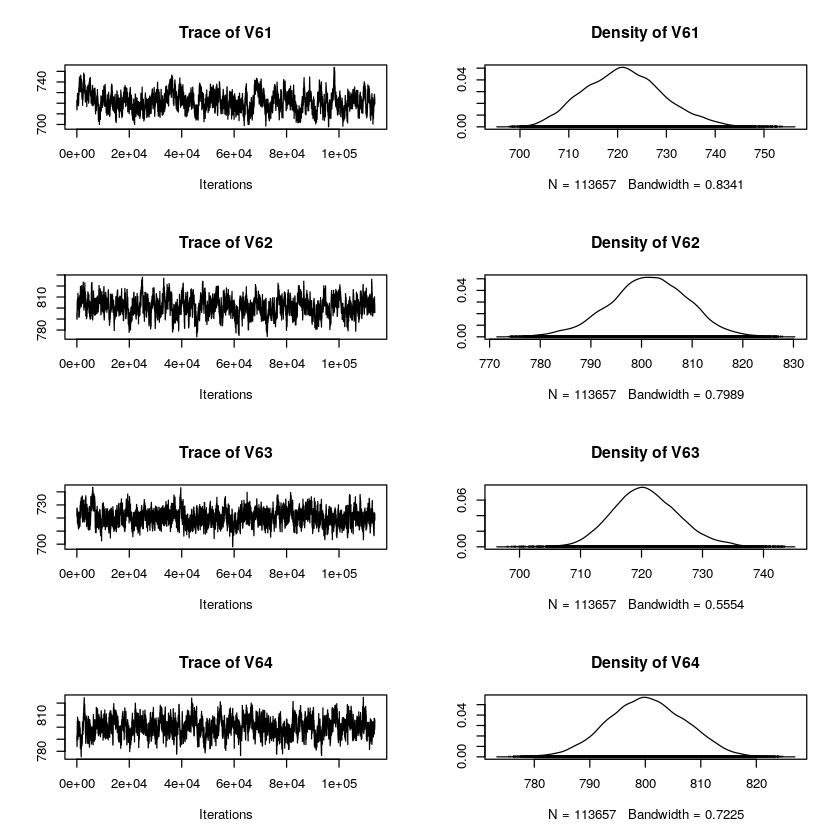

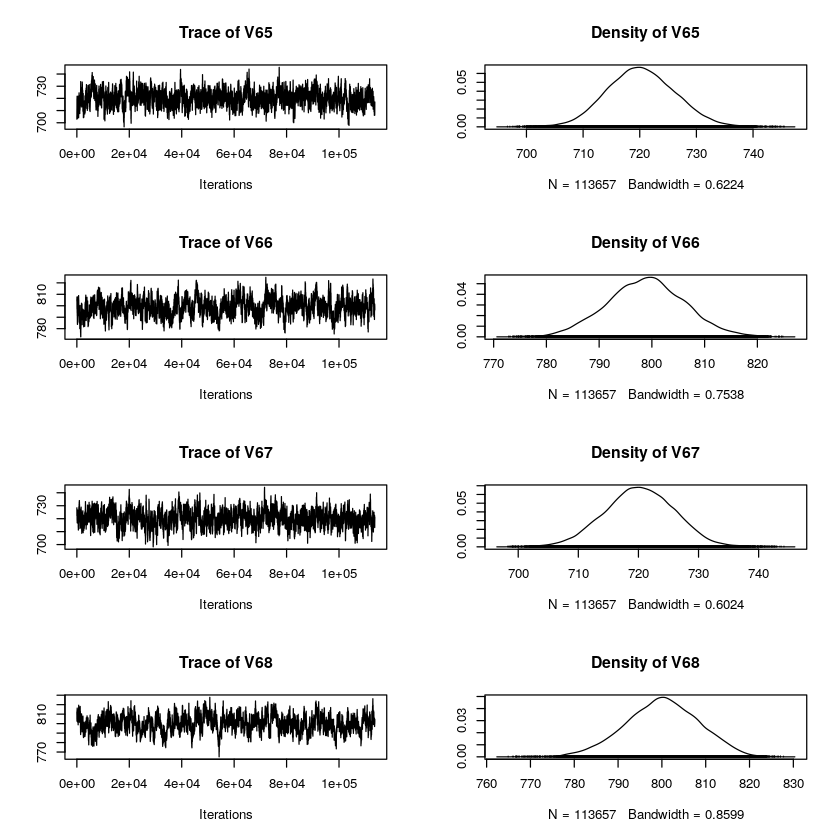

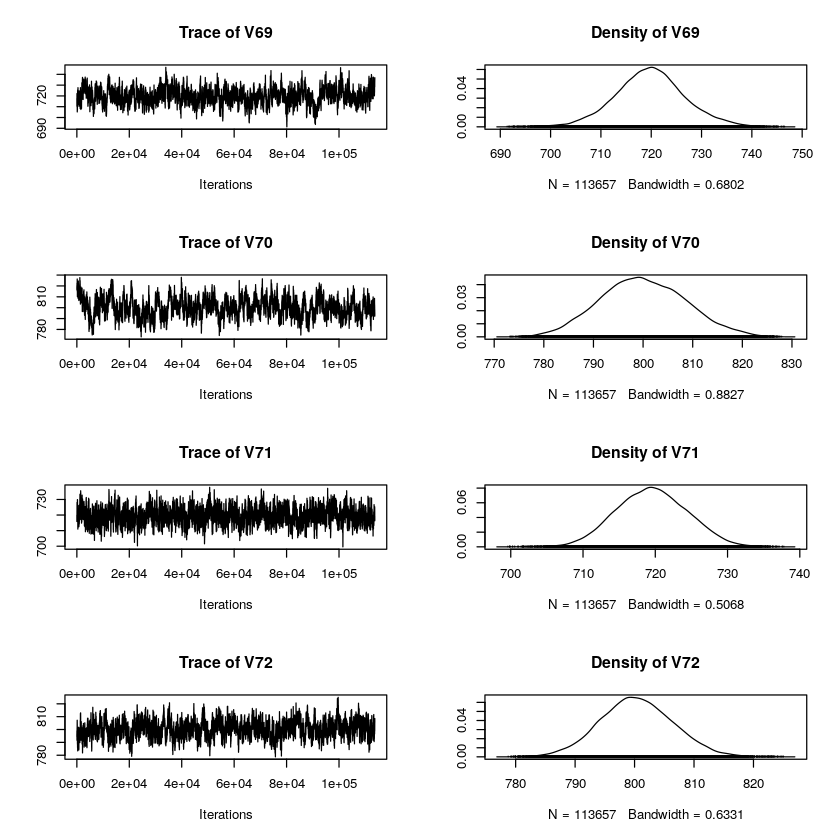

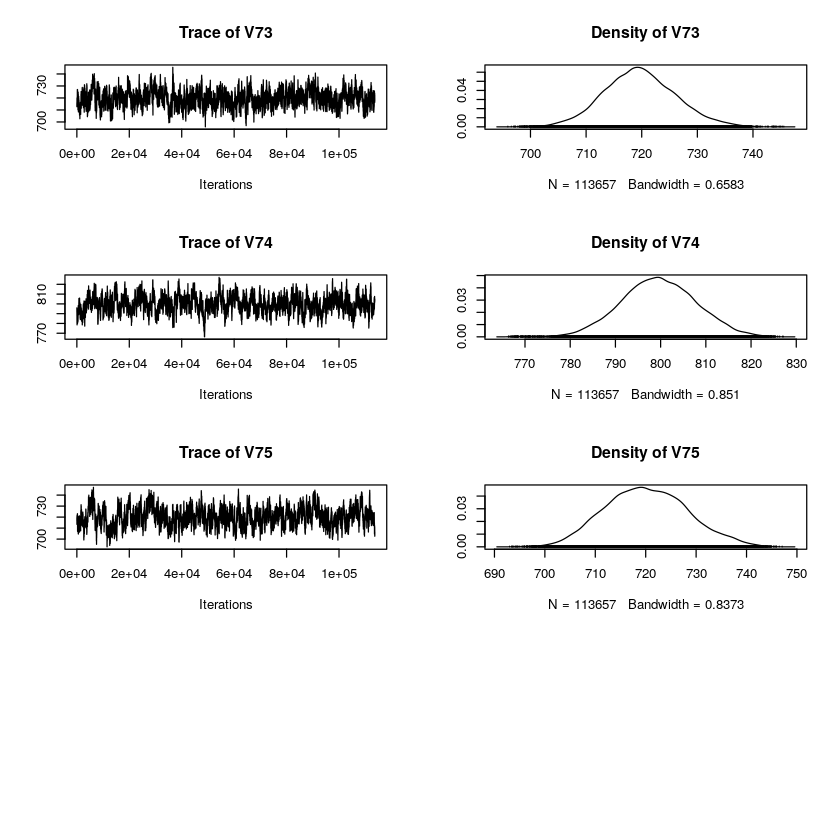

In [15]:
plot(mcmcOb)

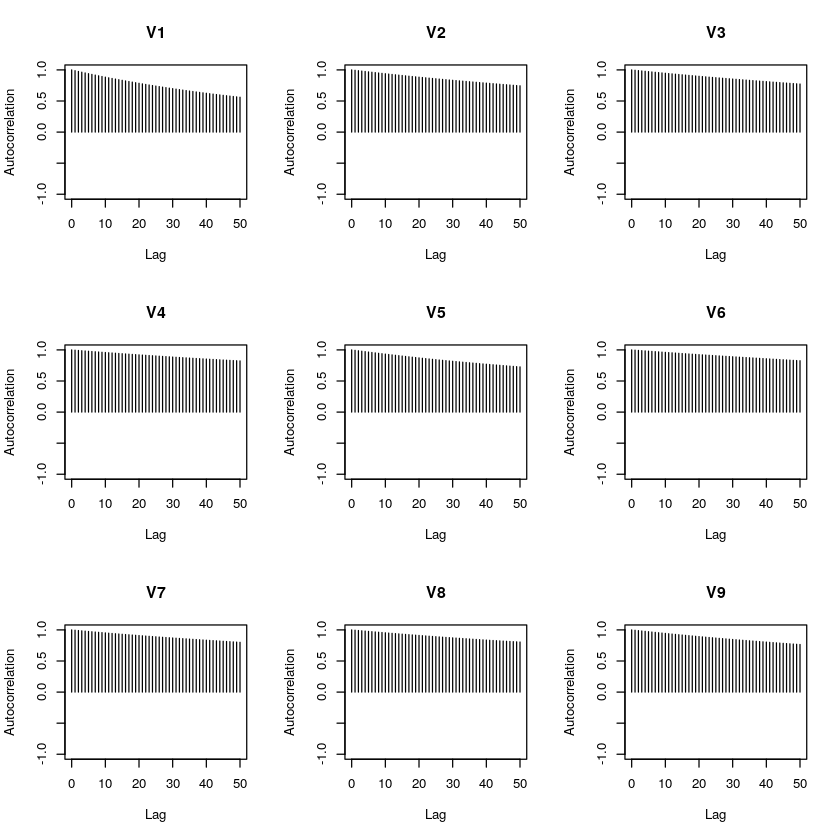

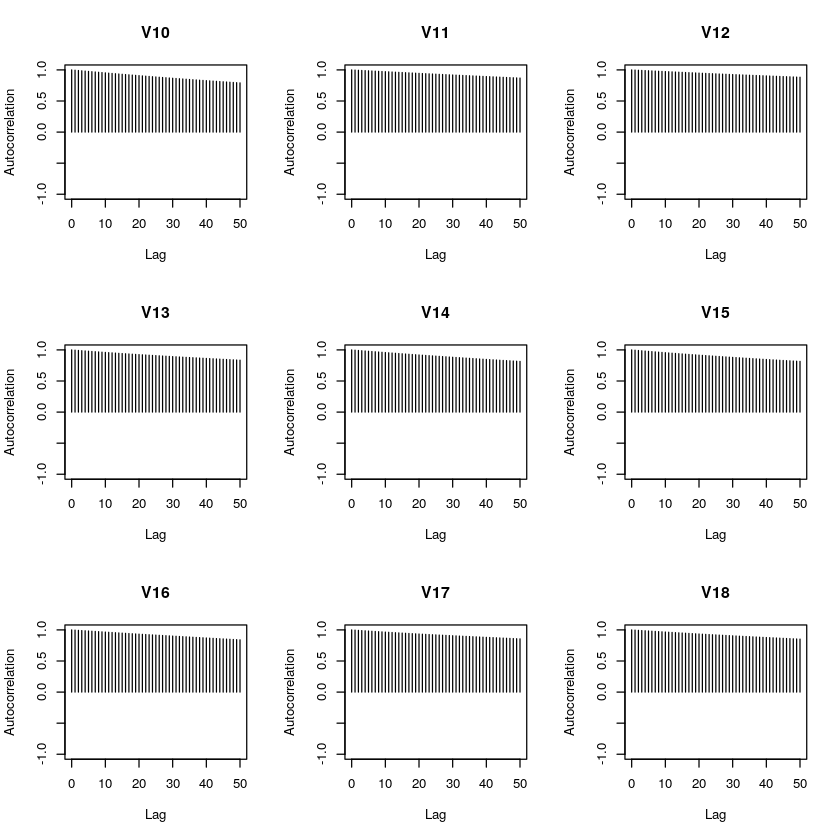

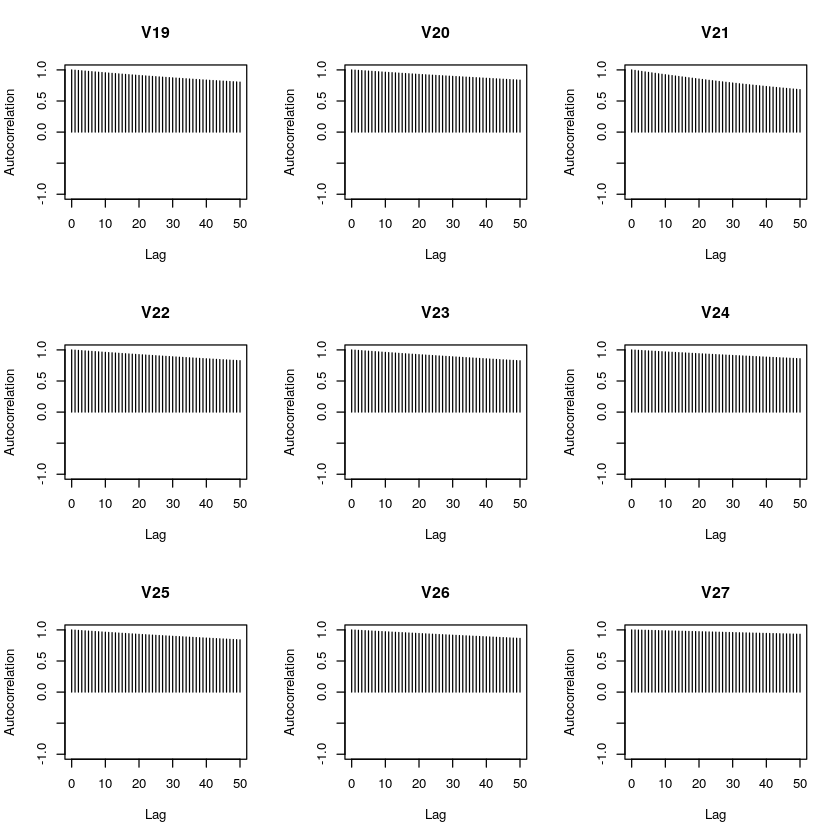

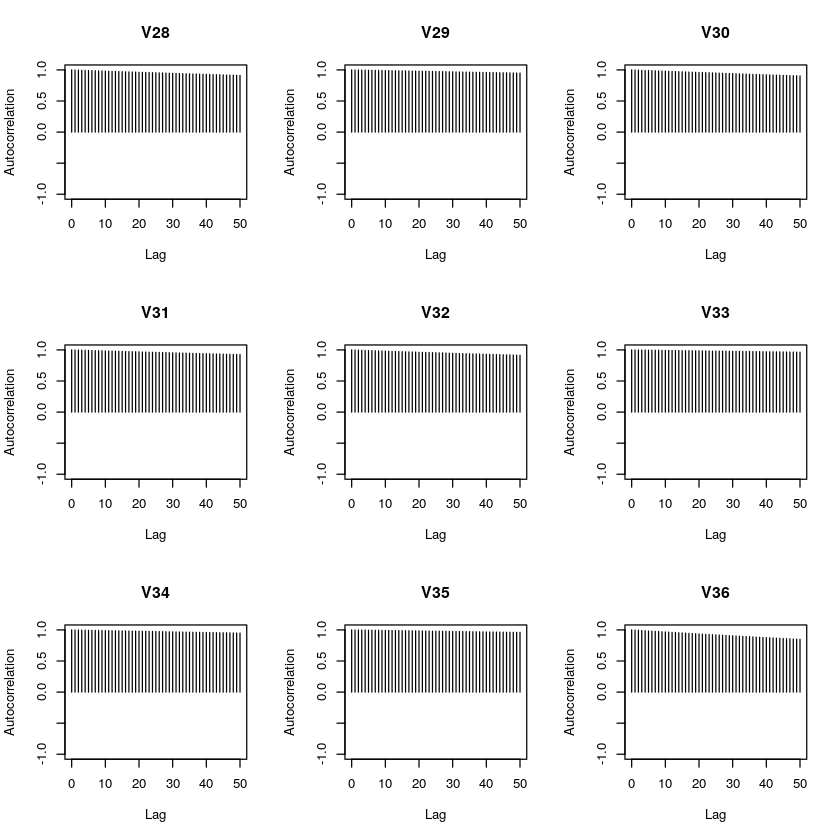

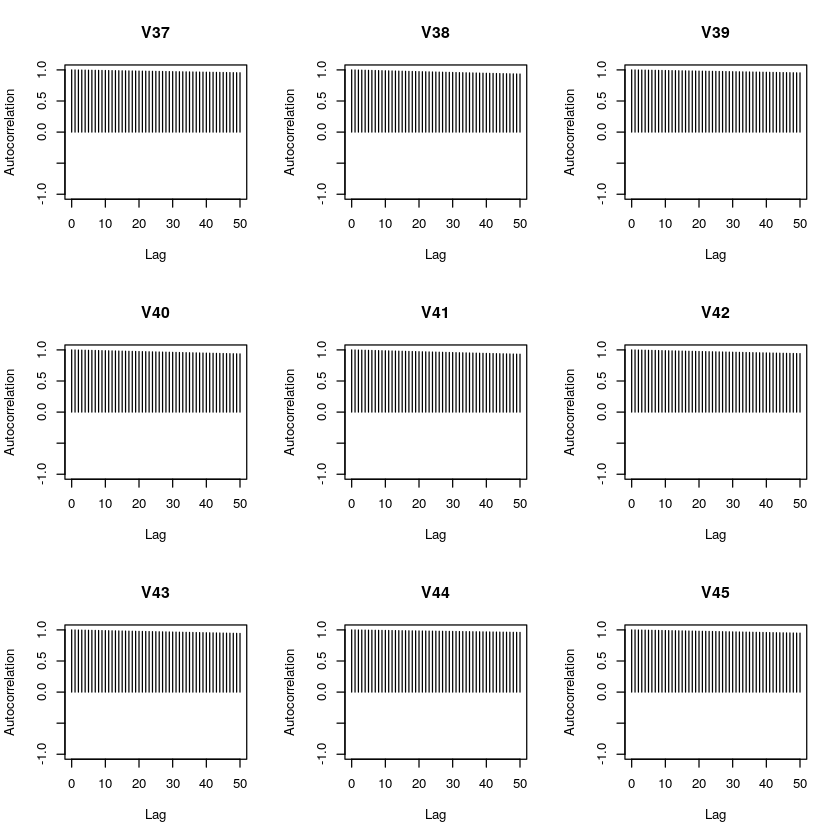

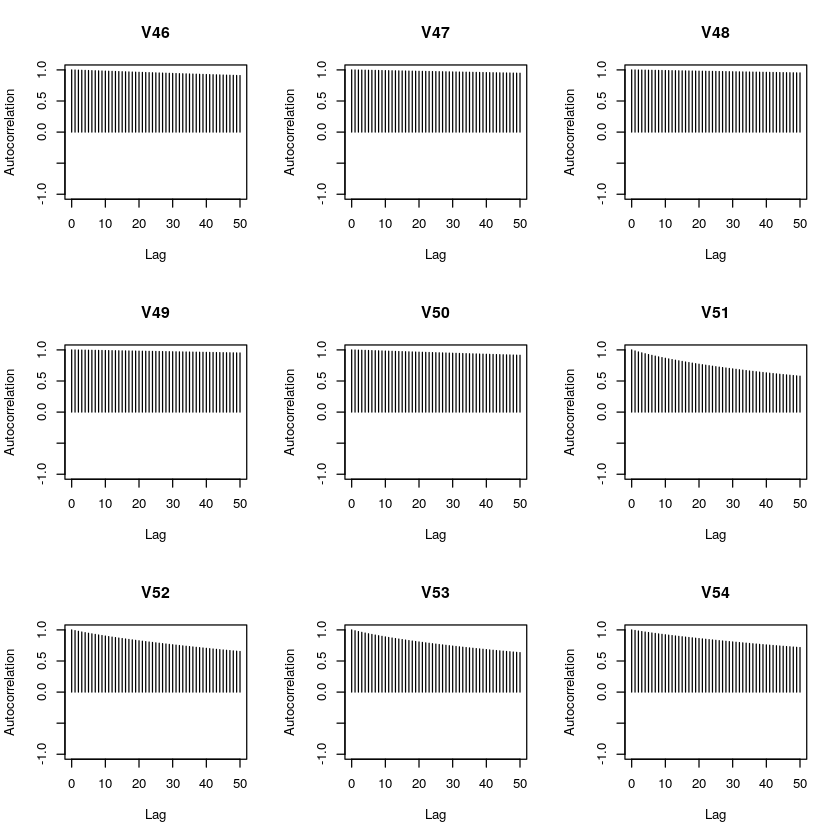

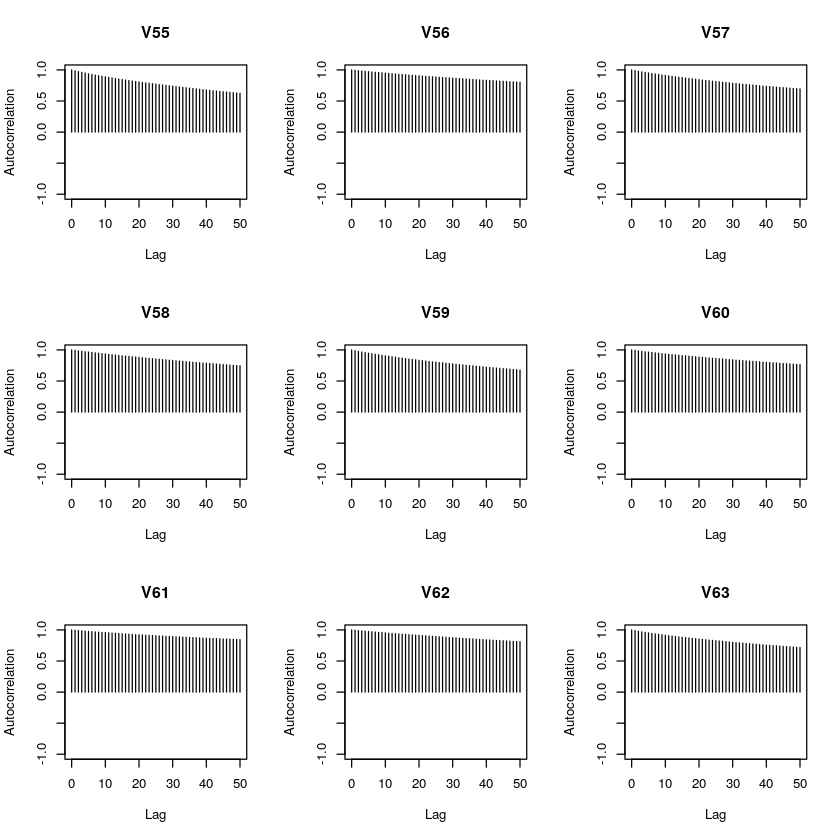

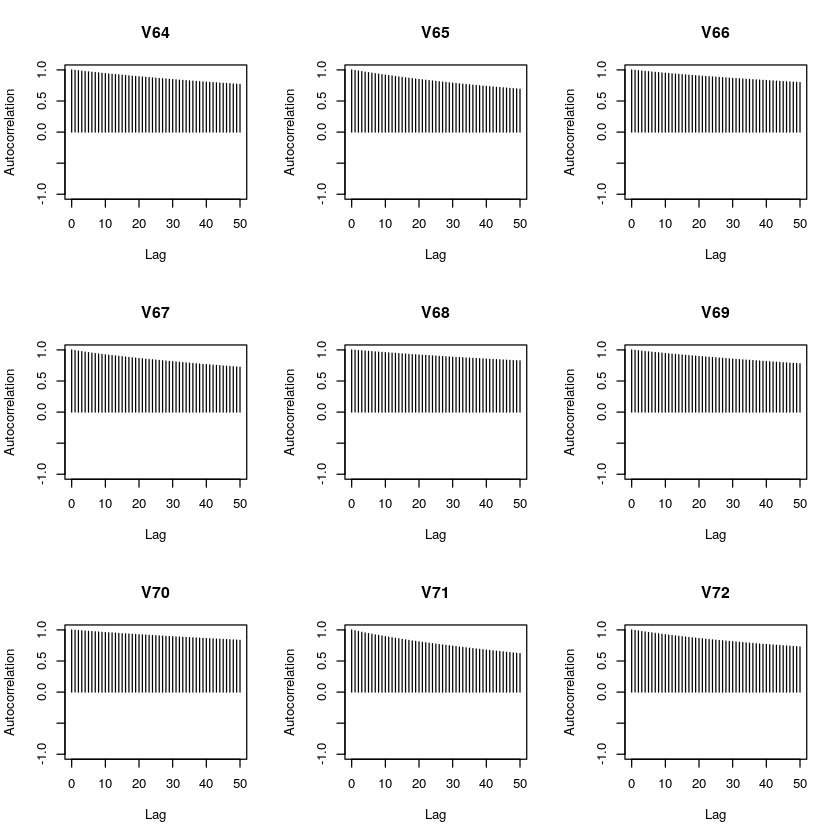

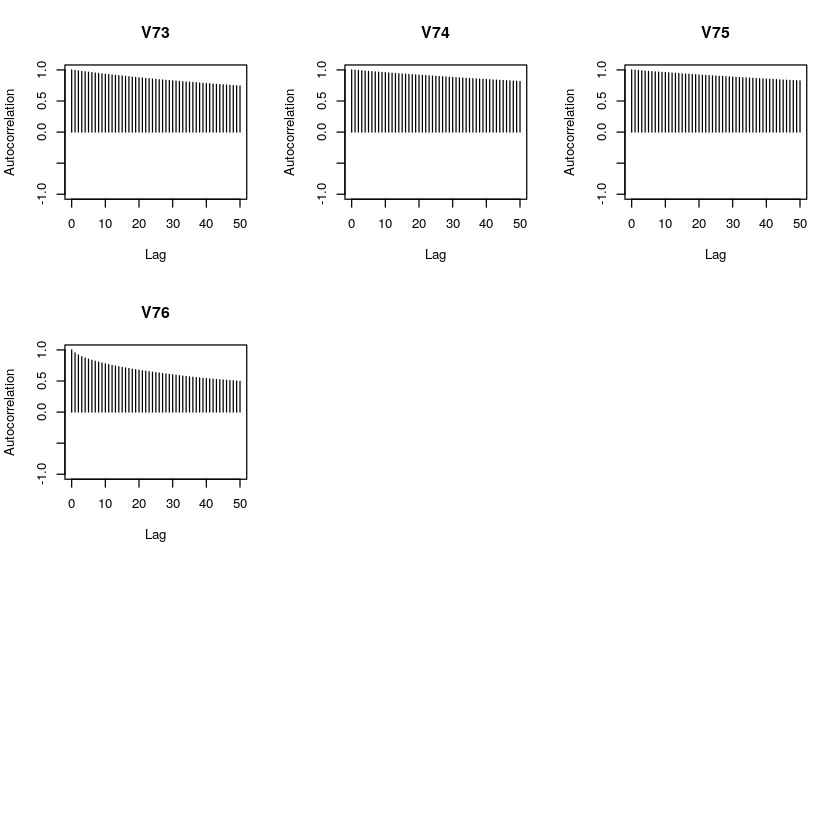

In [6]:
autocorr.plot(mcmcOb, lag.max = 50)

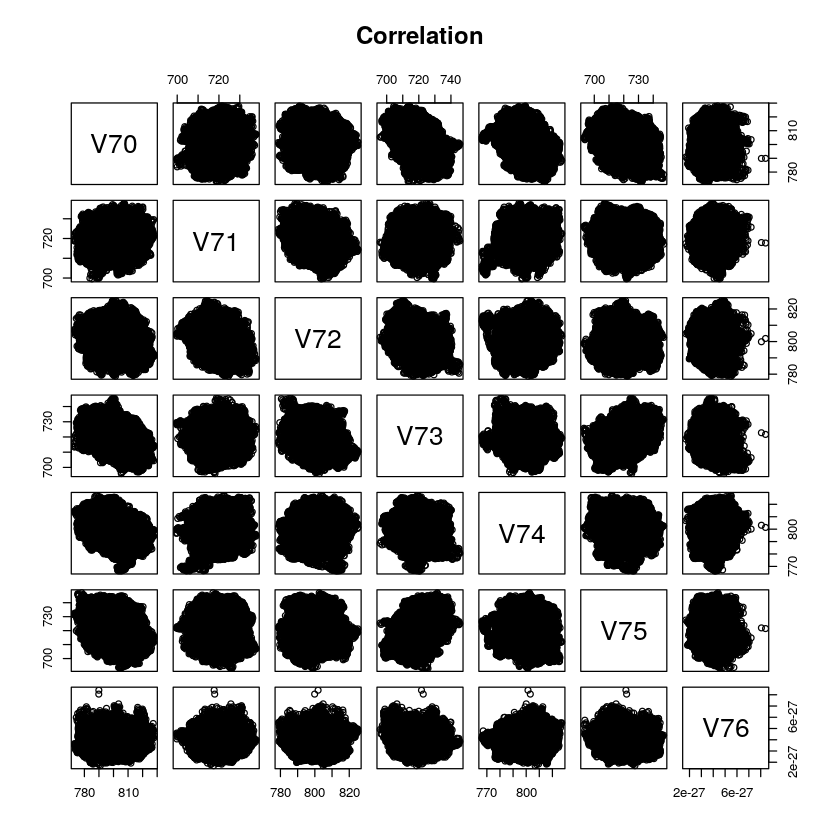

In [9]:
plot(dataframe_markovchain[, 70:c(length( names( dataframe_markovchain ) )  ) ], main= "Correlation")